In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

from nltk import word_tokenize, pos_tag

import gensim

import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
nltk.download('stopwords')

C:\Users\asus\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
decode_map = {0: "NORMAL", 1: "DEPRESSED"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [3]:
df=pd.read_csv('Cap\preprocess_tot_his.csv', delimiter = ',',encoding='utf-8')
df.head()

,Username,Time,Body,Subreddit,Depressed
0,#NAME?,1560809415,francisco lindor campaign video allstar shortstop,baseball,0
1,#NAME?,1554148757,campaign idea planning short campaign family i...,TalesFromtheLoopRPG,0
2,#NAME?,1562409865,cdn 37 indian pitcher carlos carrasco reveals ...,baseball,0
3,#NAME?,1559943812,henry david thoreau v chris mccandless henry d...,whowouldwin,0
4,#NAME?,1552877855,cleveland indian terry francona indian manager...,baseball,0


In [4]:
df.Depressed = df.Depressed.apply(lambda x: decode_sentiment(x))

In [5]:
df=df.drop(['Time', 'Subreddit'], axis = 1) 

In [6]:
from textblob import TextBlob

In [7]:
df['Polarity'] = df['Body'].apply(lambda tweet: TextBlob(str(tweet)).sentiment[0])
df['Subjectivity'] = df['Body'].apply(lambda tweet: TextBlob(str(tweet)).sentiment[1])

In [8]:
df.head()

,Username,Body,Depressed,Polarity,Subjectivity
0,#NAME?,francisco lindor campaign video allstar shortstop,NORMAL,0.000000,0.000000
1,#NAME?,campaign idea planning short campaign family i...,NORMAL,-0.076389,0.235865
2,#NAME?,cdn 37 indian pitcher carlos carrasco reveals ...,NORMAL,0.400000,0.700000
3,#NAME?,henry david thoreau v chris mccandless henry d...,NORMAL,0.250000,0.333333
4,#NAME?,cleveland indian terry francona indian manager...,NORMAL,0.000000,0.000000


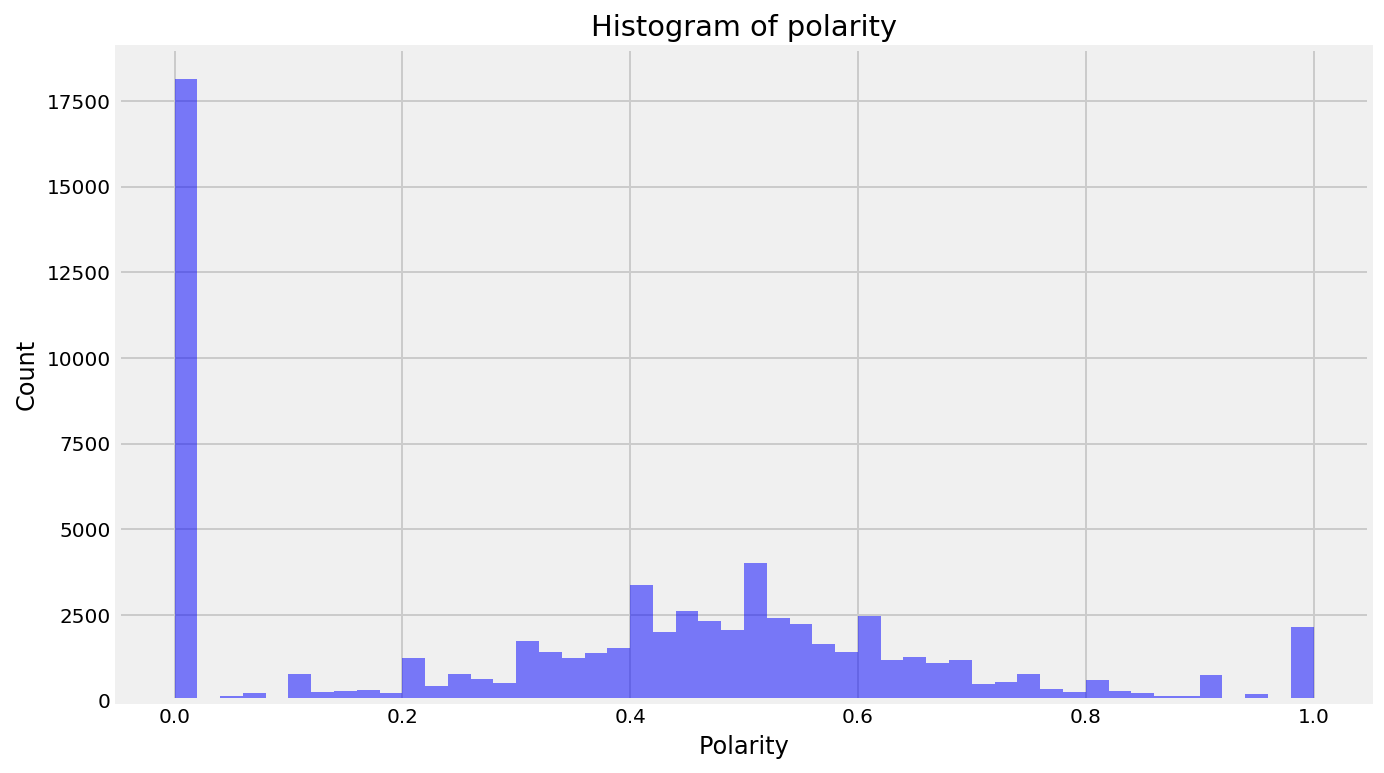

In [9]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.Subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Subjecticity')
plt.show();

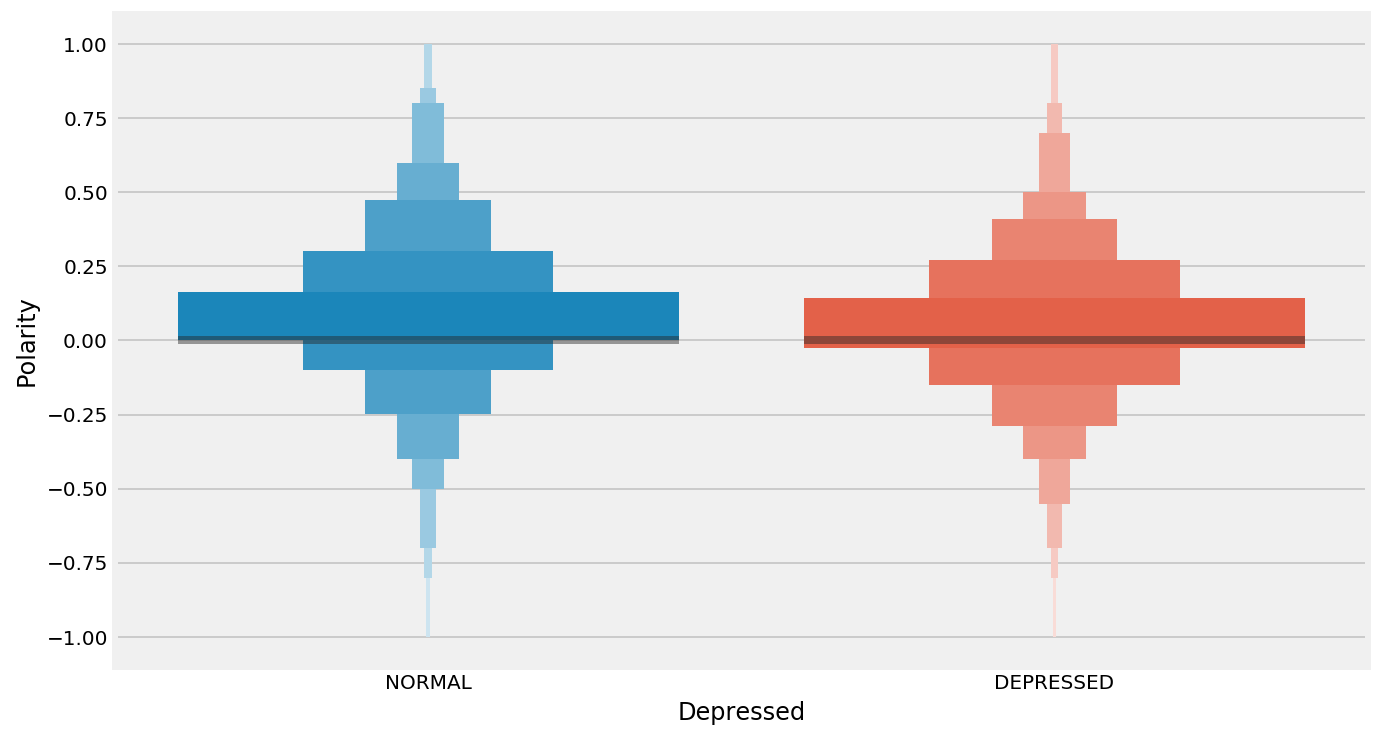

In [10]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxenplot(x='Depressed', y='Polarity', data=df)
plt.show();

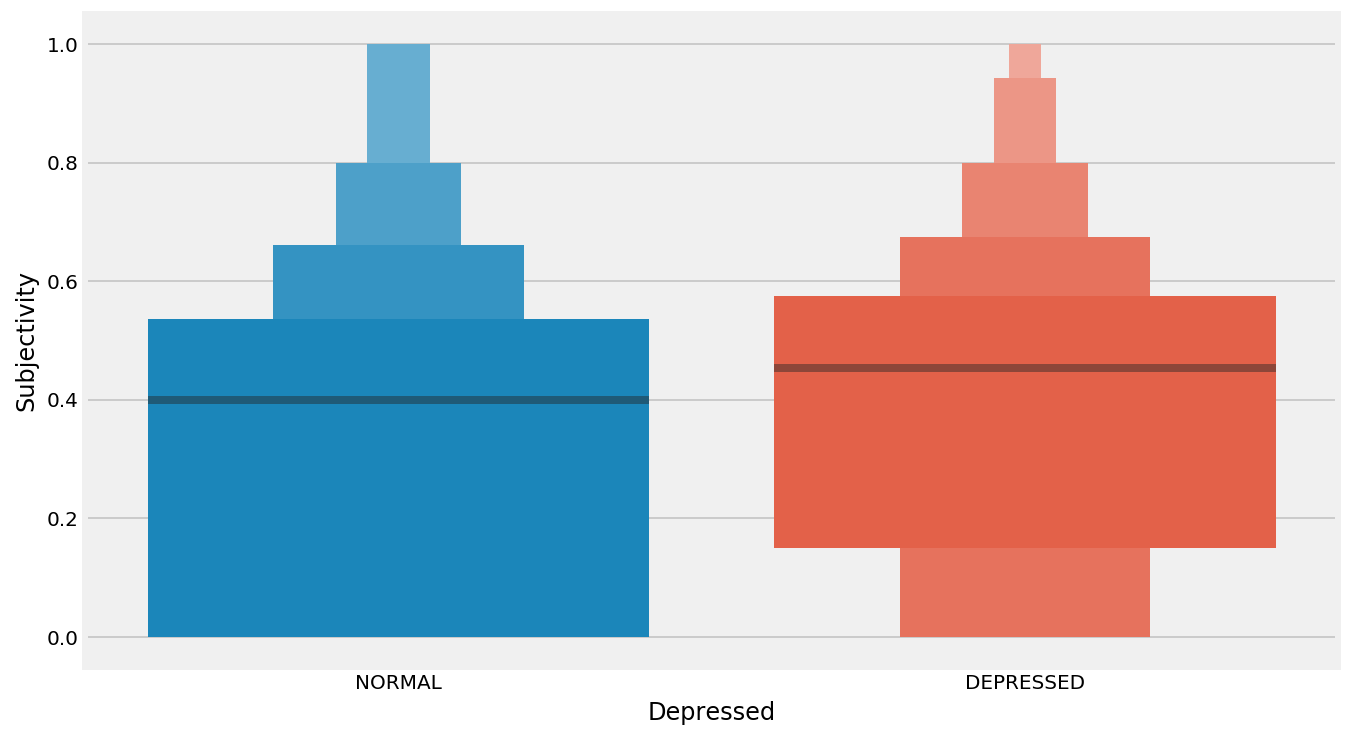

In [11]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxenplot(x='Depressed', y='Subjectivity', data=df)
plt.show();

In [12]:
df['Noun Phrases']= df['Body'].apply(lambda tweet: len(TextBlob(str(tweet)).noun_phrases))

In [13]:
tag=["CC","CD","DT","EX","FW","IN","JJ","JJR","JJS","LS","MD","NN","NNS","NNP","NNPS",
      "PDT","POS","PRP","PRP$","RB","RBR","RBS","RP","TO","UH","VB","VBD","VBG","VBN",
      "VBP","VBZ","WDT","WP","WP$","WRB"]

In [16]:
for i in tag:
    df[i] = df['Body'].apply(lambda tweet: sum(1 for word, pos in pos_tag(word_tokenize(str(tweet))) if pos.startswith(i)))

In [18]:
df.head()

,Username,Body,Depressed,Polarity,Subjectivity,Noun Phrases,CC,CD,DT,EX,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
0,#NAME?,francisco lindor campaign video allstar shortstop,NORMAL,0.000000,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#NAME?,campaign idea planning short campaign family i...,NORMAL,-0.076389,0.235865,58,0,4,0,0,...,68,18,20,9,6,5,0,0,0,1
2,#NAME?,cdn 37 indian pitcher carlos carrasco reveals ...,NORMAL,0.400000,0.700000,1,0,1,0,0,...,2,1,0,0,0,0,0,0,0,0
3,#NAME?,henry david thoreau v chris mccandless henry d...,NORMAL,0.250000,0.333333,5,0,1,0,0,...,2,2,0,0,0,0,0,0,0,0
4,#NAME?,cleveland indian terry francona indian manager...,NORMAL,0.000000,0.000000,2,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [26]:
df['Depressed'] = df['Depressed'].map({"DEPRESSED": 1, "NORMAL": 0}) 
df.to_csv('Cap/PartsOfSpeech.csv', sep=',', encoding='utf-8',index=False)

In [2]:
df=pd.read_csv('Cap\PartsOfSpeech.csv', delimiter = ',',encoding='utf-8')

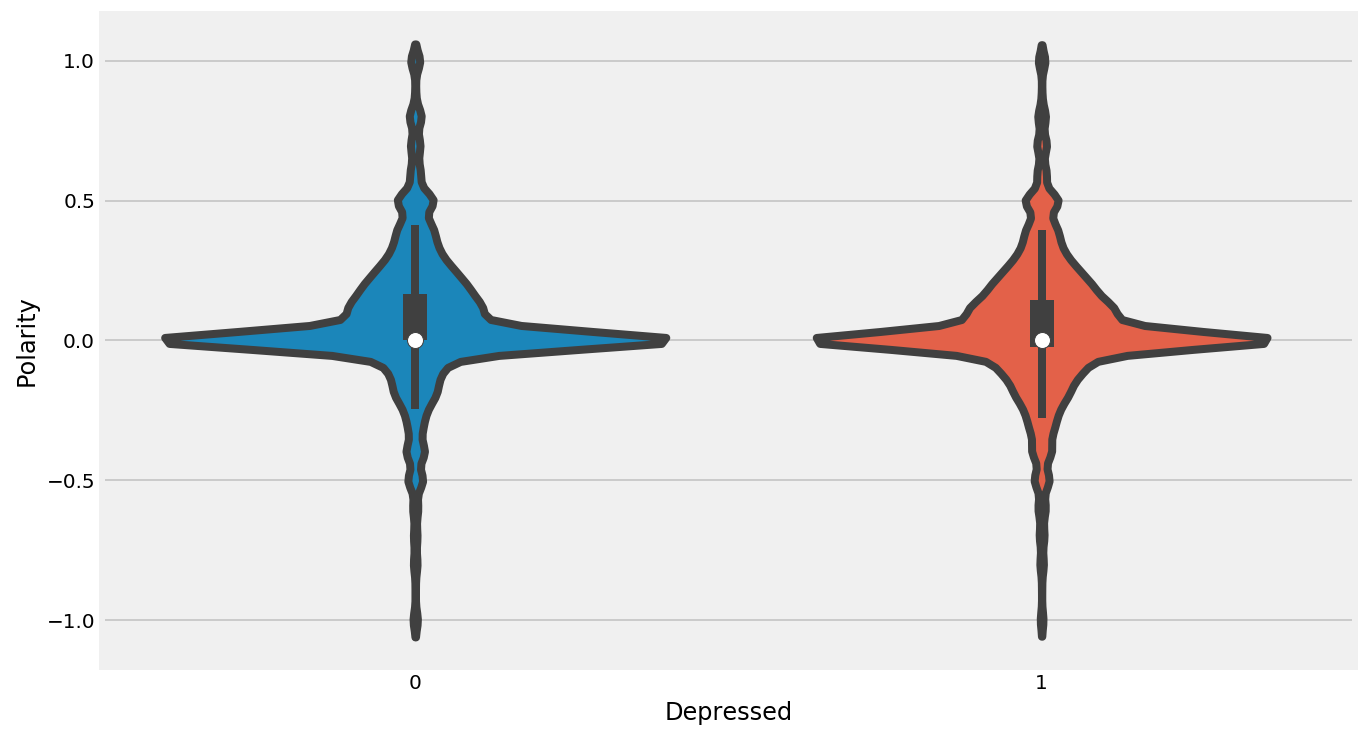

In [3]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.violinplot(x='Depressed', y='Polarity', data=df)
plt.show();

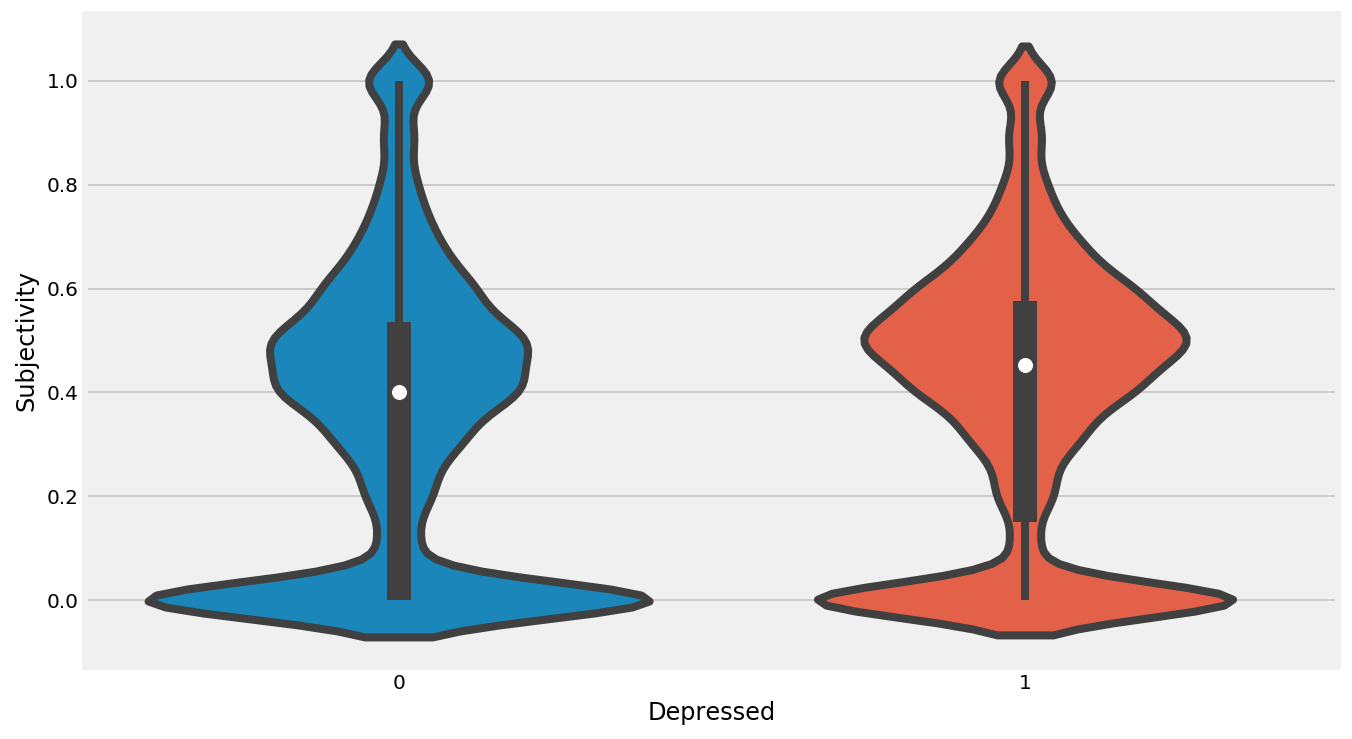

In [4]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.violinplot(x='Depressed', y='Subjectivity', data=df)
plt.show();

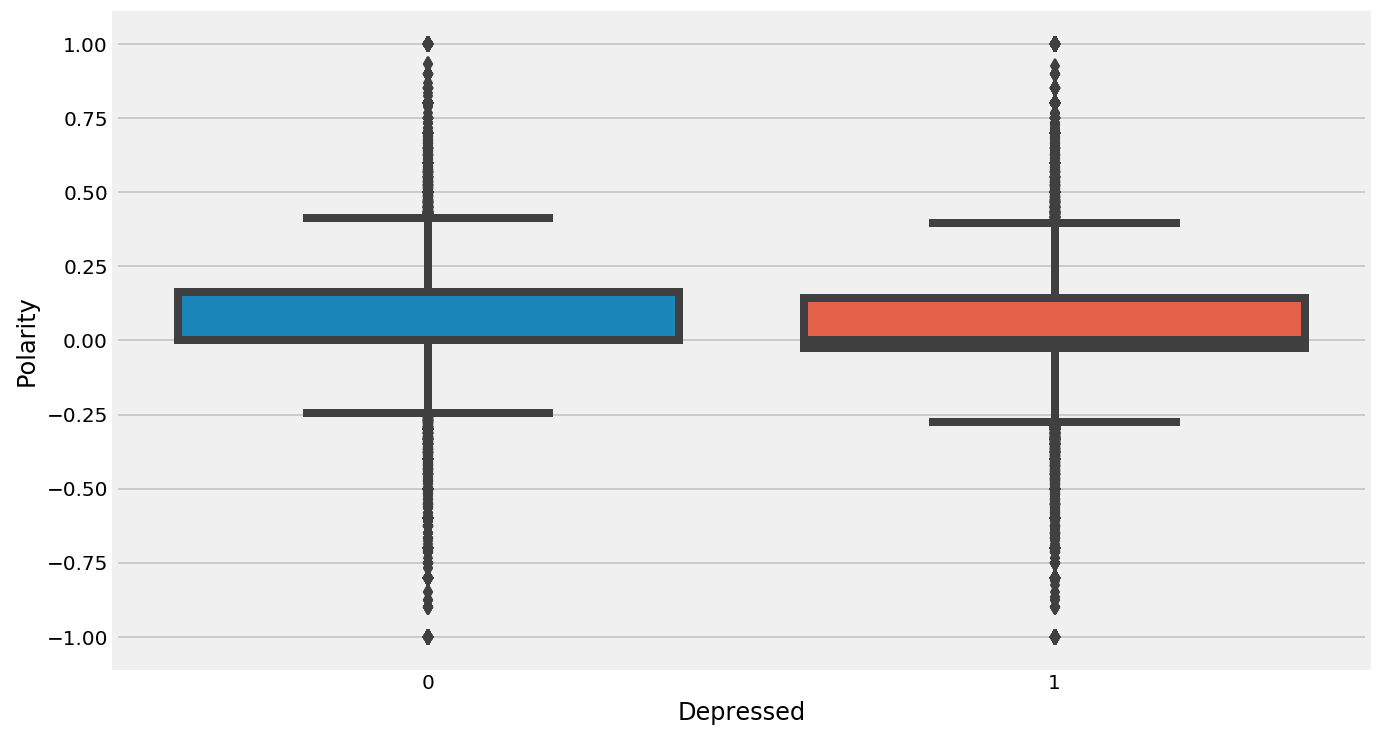

In [5]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='Depressed', y='Polarity', data=df)
plt.show();

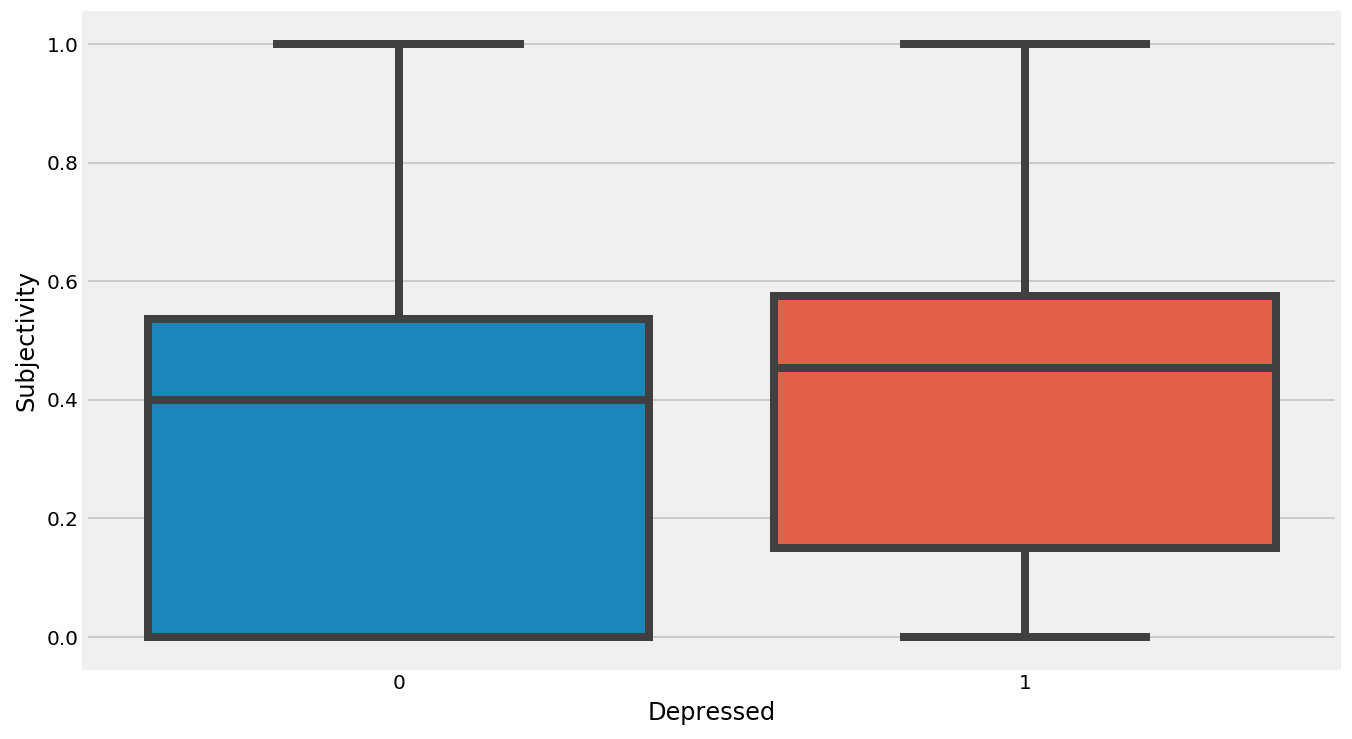

In [7]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='Depressed', y='Subjectivity', data=df)
plt.show();

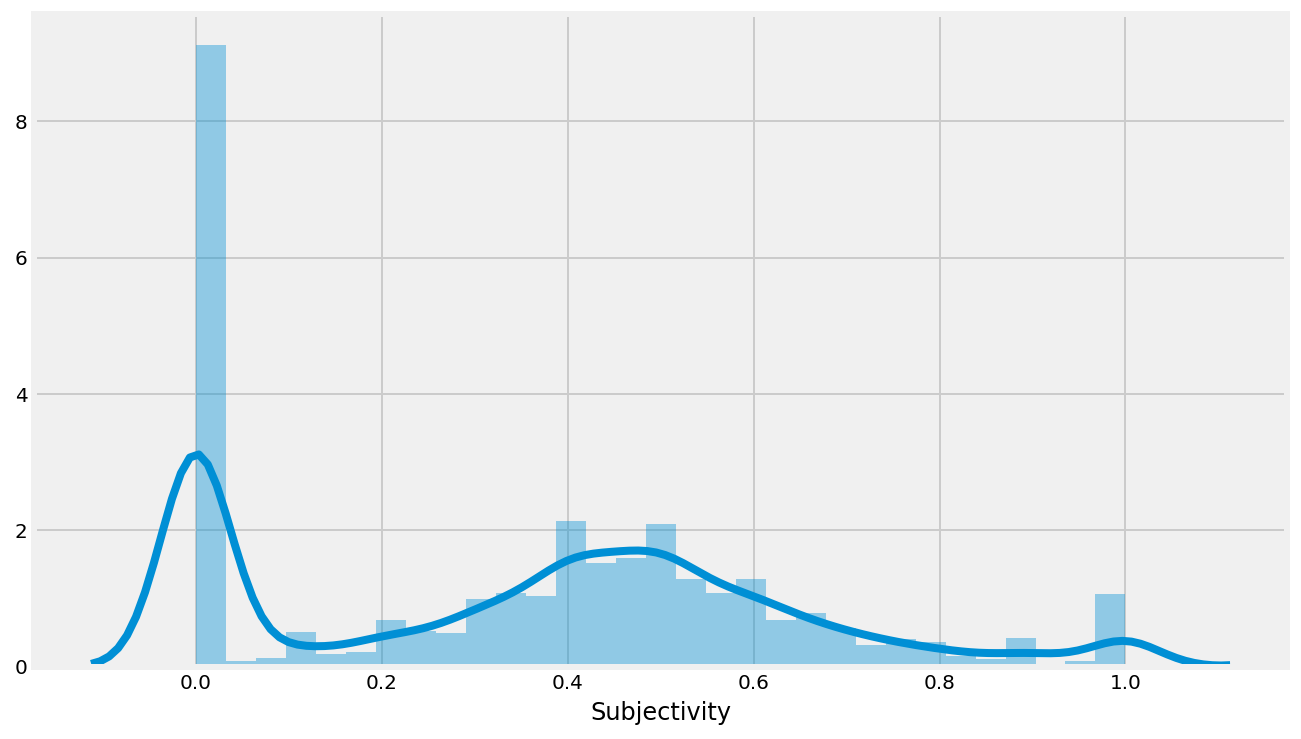

In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(df.loc[df['Depressed'] == 0].Subjectivity)
plt.show();

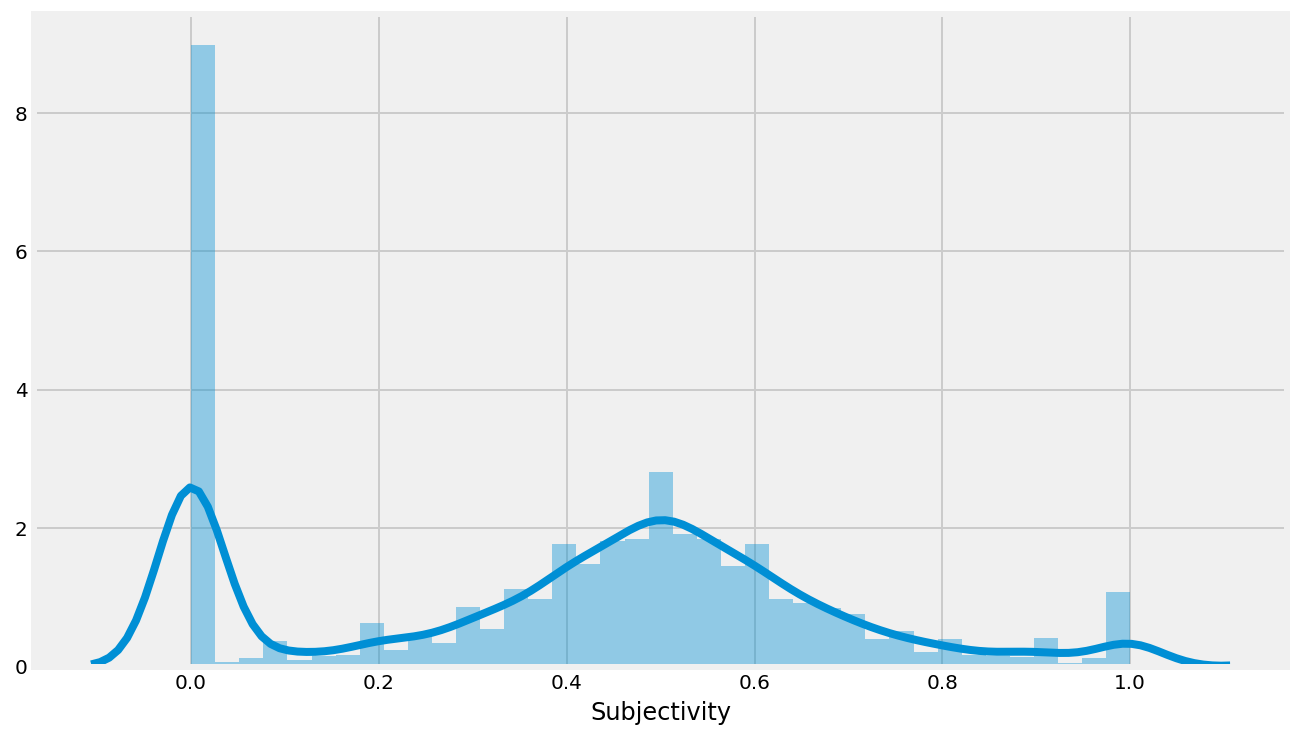

In [14]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(df.loc[df['Depressed'] == 1].Subjectivity)
plt.show();

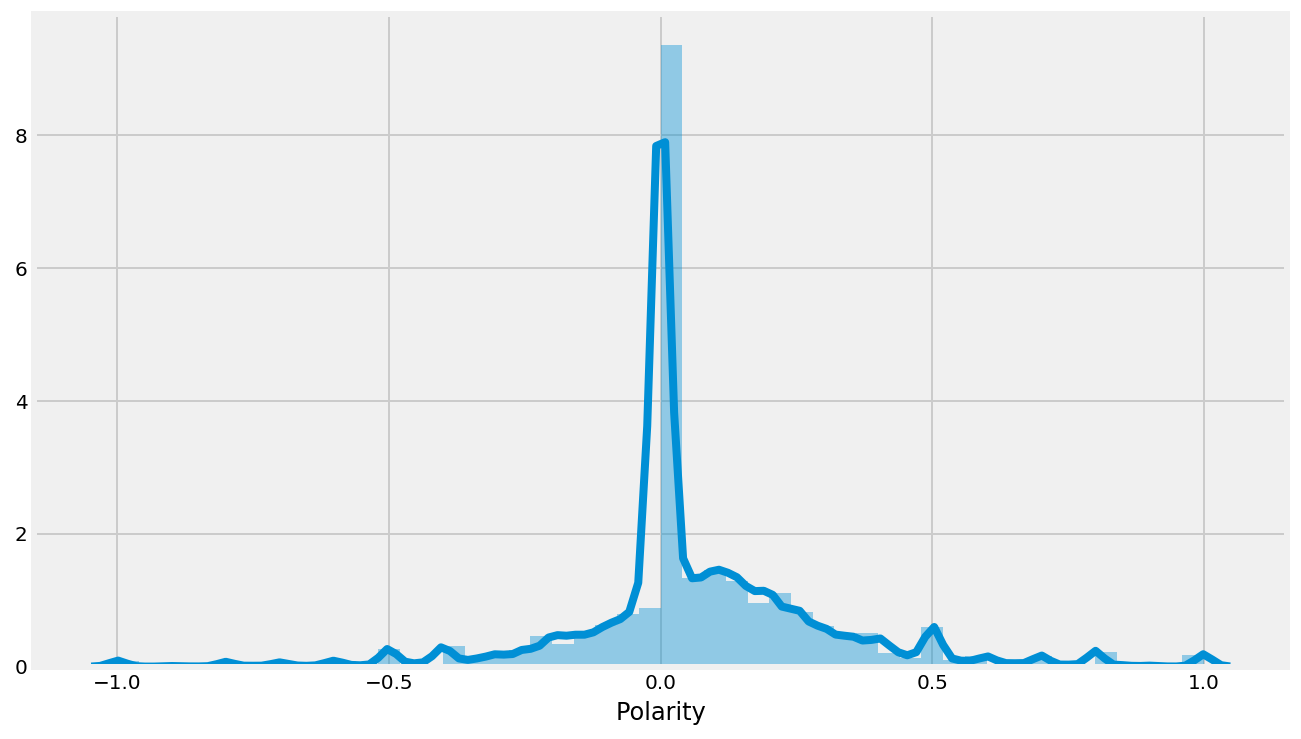

In [17]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(df.loc[df['Depressed'] == 0].Polarity)
plt.show();

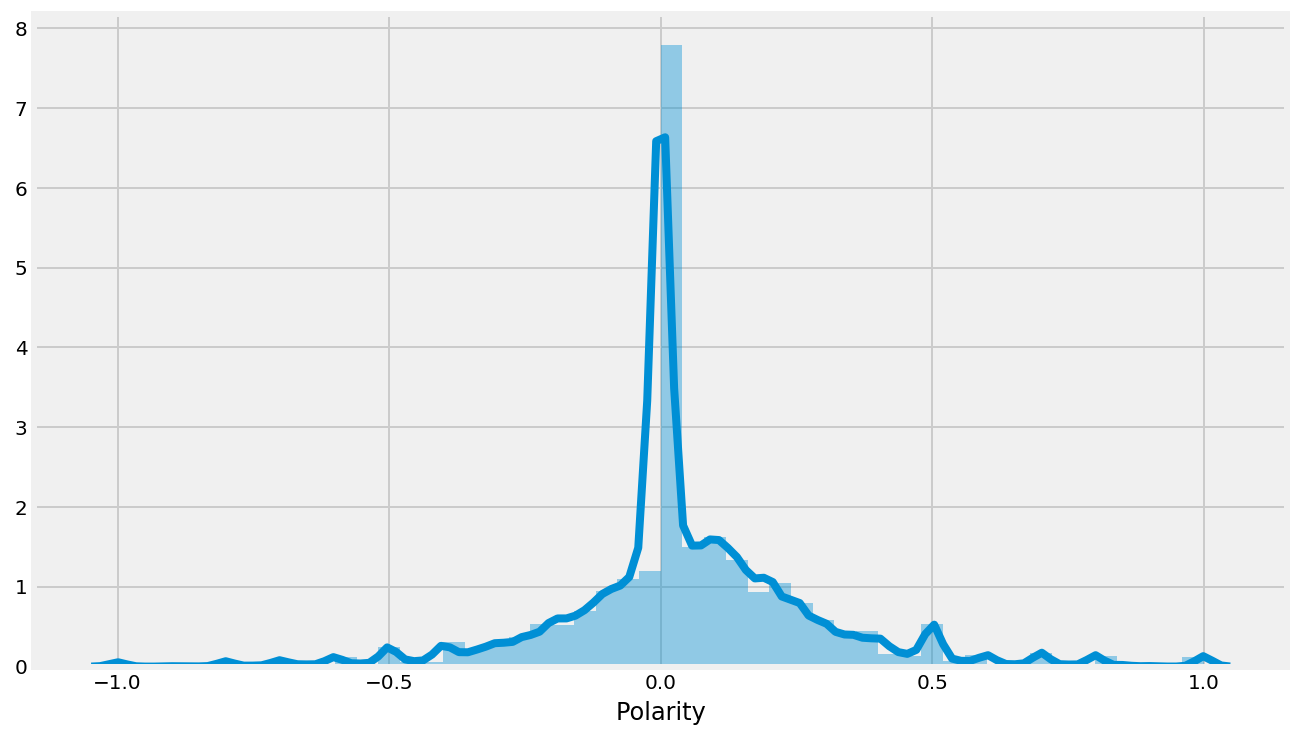

In [16]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(df.loc[df['Depressed'] == 1].Polarity)
plt.show();